In [1]:
import sys
import os
from PIL import Image
sys.path.insert(0, os.path.abspath('../..'))
from ultralytics import YOLO
from ultralytics.yolo.utils import ROOT

### Compile

We use half precision (FP16) to maximize performance

In [2]:
model = YOLO('yolov8l.pt', task='detect')
model.export(format="neuronx", half=True)

  0%|          | 0.00/83.7M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.111 🚀 Python-3.8.10 torch-1.13.1+cu117 CPU

PyTorch: starting from yolov8l.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (83.7 MB)

Neuronx: starting export with torch_neuronx 1.13.1.1.7.0 and neuronx-cc 2.6.0.19+3d819e565...
Neuronx: WARNING ⚠️ export may fail if neuron runtime is not installed (does not require neuron hardware)
2023-07-11T15:28:23Z WARNING 20551 [LayoutBottleneck]: Connected component _multiply.2435 has no matmult/reduce/batchnorm. Guessing layout. Considering putting on CPU.
Neuronx: export success ✅ 116.8s, saved as yolov8l_fp16.neuronx (69.0 MB)

Export complete (118.9s)
Results saved to /home/ubuntu/repos/blog/yolov8_neuron/examples/YOLOv8-Inferentia
Predict:         yolo predict task=detect model=yolov8l_fp16.neuronx imgsz=640 
Validate:        yolo val task=detect model=yolov8l_fp16.neuronx imgsz=640 data=coco.yaml 
Visualize:       https://netron.app


'yolov8l_fp16.neuronx'

### Inference

Load compiled model

In [3]:
model = YOLO('yolov8l_fp16.neuronx', task='detect')

Run inference on a video using a batch size of 128 frames

In [5]:
res = model(os.path.join(ROOT, 'assets/parkour_pov.mp4'))



    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (128/6681) /home/ubuntu/repos/blog/yolov8_neuron/ultralytics/assets/parkour_pov.mp4: 640x640 (no detections), 640x640 (no detections), 640x640 (no detections), 640x640 (no detections), 640x640 (no detections), 640x640 (no detections), 640x640 (no detections), 640x640 (no detections), 640x640 (no detections), 640x640 (no detections), 640x640 (no detections), 640x640 (no detections), 640x640 (no detections), 640x640 (no detections), 640x640 (no de

Check results

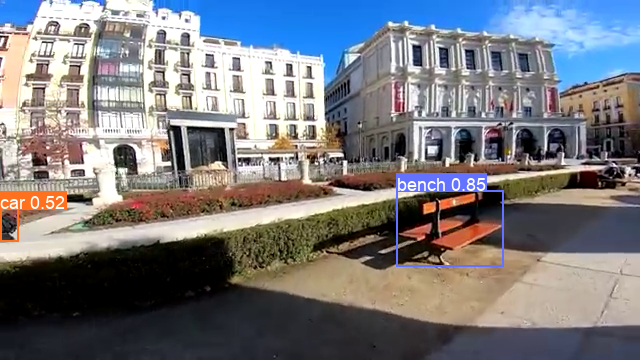

In [6]:
img = res[150].plot(pil=True)
im = Image.fromarray(img[:,:,::-1])
im.show()

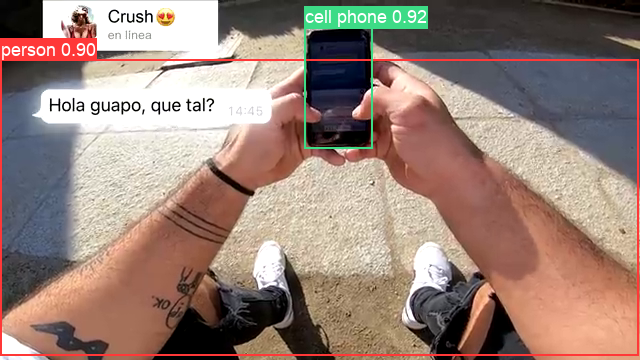

In [7]:
img = res[500].plot(pil=True)
im = Image.fromarray(img[:,:,::-1])
im.show()